# Chapter 2: Pretrained networks


## Purpose:
- How to use a pre-trained deep learning model?

### Note 
#### At this stage, It’s not essential to us to understand the details of each architecture. 

 Here, we will use a pre-trained model for image classification and we  demonstrat how to load and run  a very classic  pretrained models on pyTorch: 

**a model that can label an image according to its content.**

A pretrained network is a model that has already been trained on a dataset. Such networks can typically produce useful results immediately after loading the network parameters.

By knowing how to use a pretrained model, we can integrate a neural network into a project without having to **design** or **train** it.

The pretrained network we’ll explore here was trained on a subset of the **ImageNet** dataset (http://imagenet.stanford.edu). **ImageNet** is a very large dataset of over 14 million images maintained by Stanford University. 

At the end of the day, we are going to end up being able to take our own images and feed them into our pretrained model, as the below figure. This will result in a list of predicted labels for that image, which we can then be examine to see what the model thinks our image is. Some images will have predictions that are accurate, and others will not!

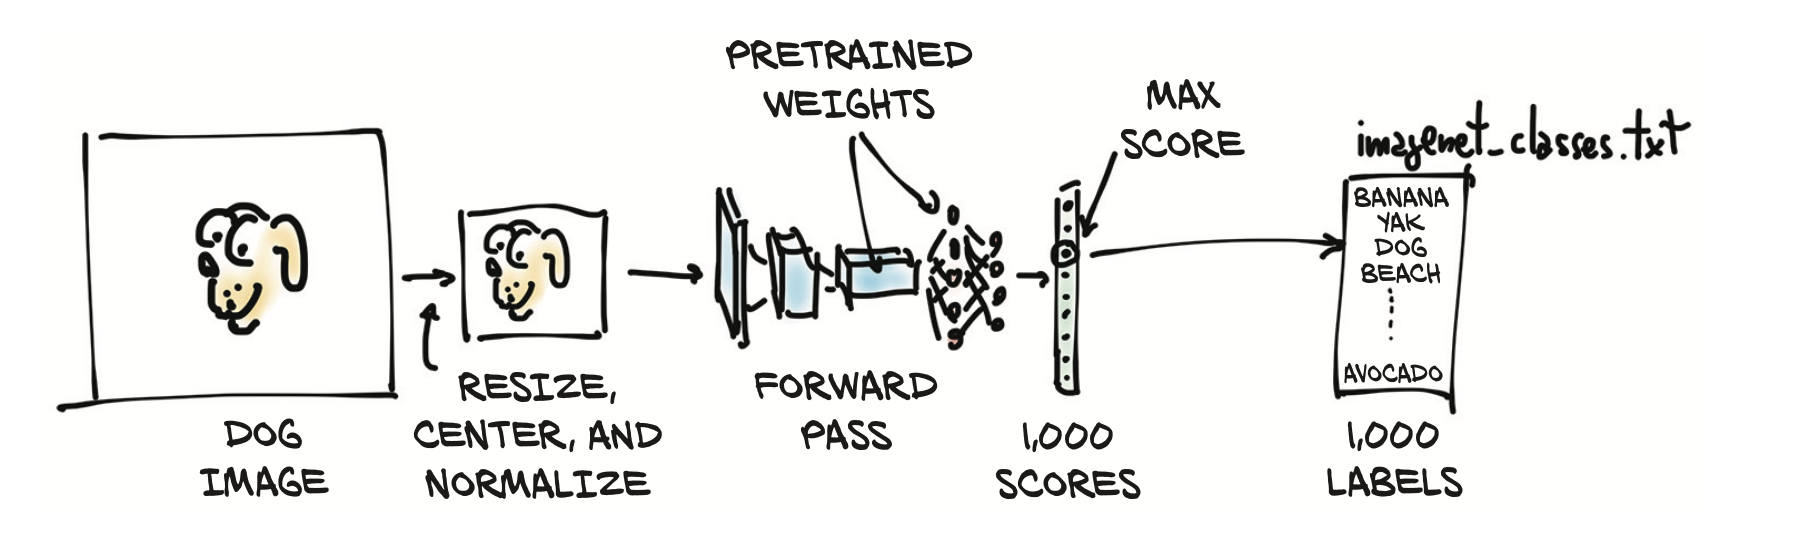

In [1]:
from IPython import display
display.Image("The_inference_process.png")

### Some background info


The input image will first be preprocessed into an instance of the multidimensional array class. It is an RGB image with height and width, so this tensor will have three dimensions: 
the three color channels, and  two spatial image dimensions of a specific size [C H W].

Our model will take that processed input image and pass it into the pretrained network to obtain scores for each class. The highest score corresponds to the most likely class according to the weights

As discussed, we will now equip ourselves with **a network trained** on **ImageNet.** To do so, we’ll take a look at the **TorchVision** project (https://github.com/pytorch/vision), which contains a few of the best-performing neural network architectures for computer vision, such as **AlexNet** (http://mng.bz/lo6z), **ResNet** (https://arxiv.org/pdf/1512.03385.pdf), and **Inception v3** (https://arxiv.org/pdf/1512.00567.pdf).

## Import the required libraries

In [2]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import models  #The predefined models can be found in torchvision.models
from torchvision import transforms

In [3]:
 dir(models)  # To take a look at the actual models:

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights',
 'RegNet_X_1_6GF_Weights',
 'R

Here the **uppercase names** correspond to **classes** that implement popular architectures for computer vision(like **'AlexNet'** and **'RegNet'**). They differ in their architecture that is, in the arrangement of the operations occurring between the input and the output.

The **lowercase names**  are **functions** that instantiate models with predefined numbers of layers and units and optionally download and load pre-trained weights into them(like **'resnet101'** and **'densenet169'**). For instance, **resnet101** returns an instance of **ResNet** with **101 layers**, **resnet18** has **18 layers**, and so on. 

These functions just make it convenient to instantiate the model with a number of layers and units that matches how the pretrained networks were built.

We’ll now turn our attention to **AlexNet** and  **ResNet**, because  they are two deep convolutional networks that set new benchmarks for image recognition in the years they were released.

After the celebrated victory of **AlexNet** at the LSVRC2012 classification contest, deep residual network (**ResNet**) was arguably the most groundbreaking work in the computer vision and deep learning community in the last few years. **ResNet** makes it possible to train up to hundreds or even thousands of layers and still achieve a compelling performance.



### AlexNet

**AlexNet** was the first convolutional network which used GPU to boost performance. This  network also  won an image-classification competition in 2015.  It  is considered as a leading architecture for any object-detection task and may have huge applications in the computer vision sector of artificial intelligence problems. 

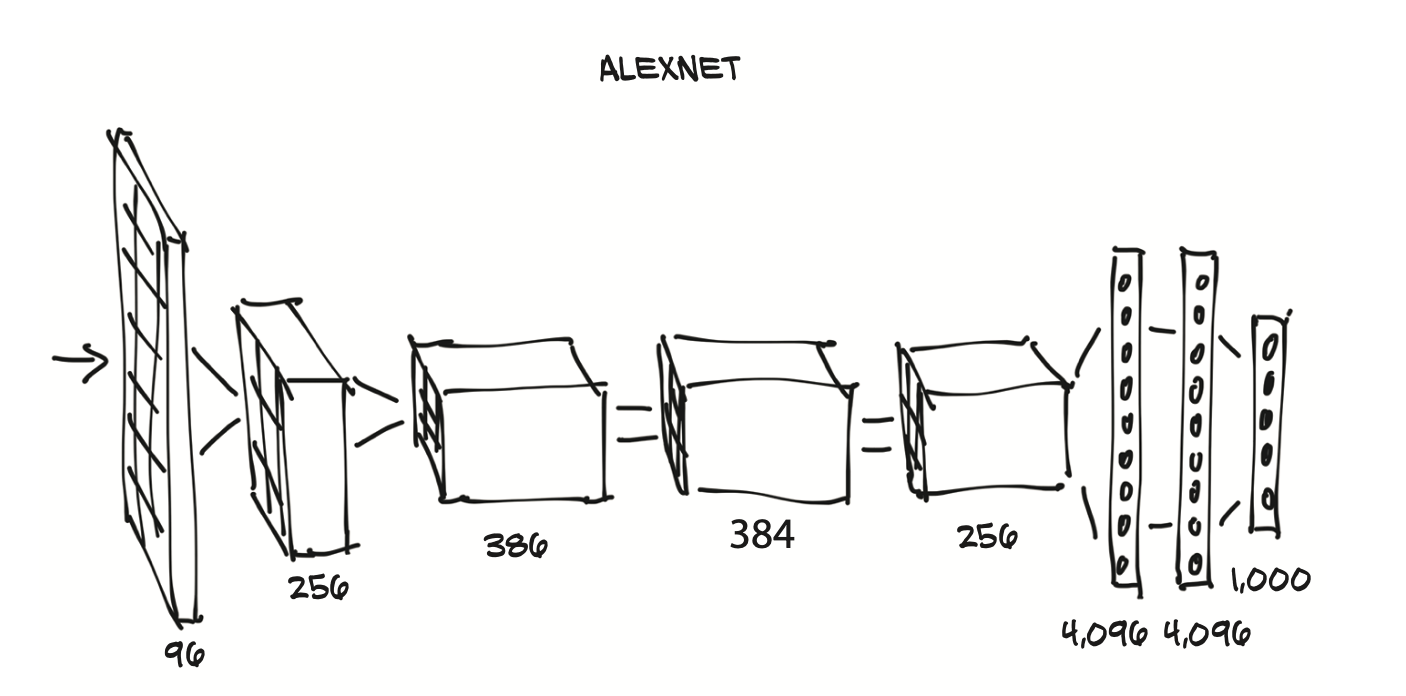

In [20]:

display.Image("Alex_Net.png") # The structure of AlexNet 


To run this architecture on an input image, we can create an instance of the **AlexNet** class by this command line;

In [21]:
alexnet = models.AlexNet() 

Now, **alexnet** is an object that can run the **AlexNet** architecture.  To use use this articture for classification we  need to either train it from scratch or load weights from prior training( which is the case now ).


Now we are turning our attention to **'ResNet'**  to  perform  a classification task.

## ResNet

We are using the **resnet101** function which instantiate a **101-layer** convolutional neural network.

We’ll pass an argument(**pretrained=True**) that will instruct the function to download the weights of resnet101 trained on the ImageNet dataset, with 1.2 million images and 1,000 categories:

## Load the model

In [22]:
resnet = models.resnet101(pretrained=True)

In [23]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

What we are seeing here is **modules**, one per line. They are individual operations, the building blocks of a neural network. They are also called **layers** in other deep learning frameworks.
If we scroll down, we’ll see a lot of Bottleneck modules repeating one after the other (101 of them!), containing convolutions and other modules. That’s the anatomy of a typical deep neural network for computer vision: a more or less sequential cascade of filters and nonlinear functions, ending with a layer (fc) producing scores for each of the 1,000 output classes (out_features).

The **resnet** variable can be called like a function, taking as input one or more images and producing an equal number of scores for each of the 1,000 ImageNet classes. Before we can do that, however, we have to preprocess the input images so they are the right size and so that their values (colors) sit roughly in the same numerical range. In order to do that, the torchvision module provides transforms, which allow us to quickly define pipelines of basic preprocessing functions:

In [24]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In this case, we defined a preprocess function that will scale the input image to 256 × 256, crop the image to 224 × 224 around the center, transform it to a tensor (a PyTorch multidimensional array: in this case, a 3D array with **color**, **height**, and
**width**), and normalize its RGB (red, green, blue) components so that they have defined means and standard deviations. These need to match what was presented to the network during training, if we want the network to produce meaningful answers.

 ## Load the image

In [25]:

img = Image.open("bobby.jpg")

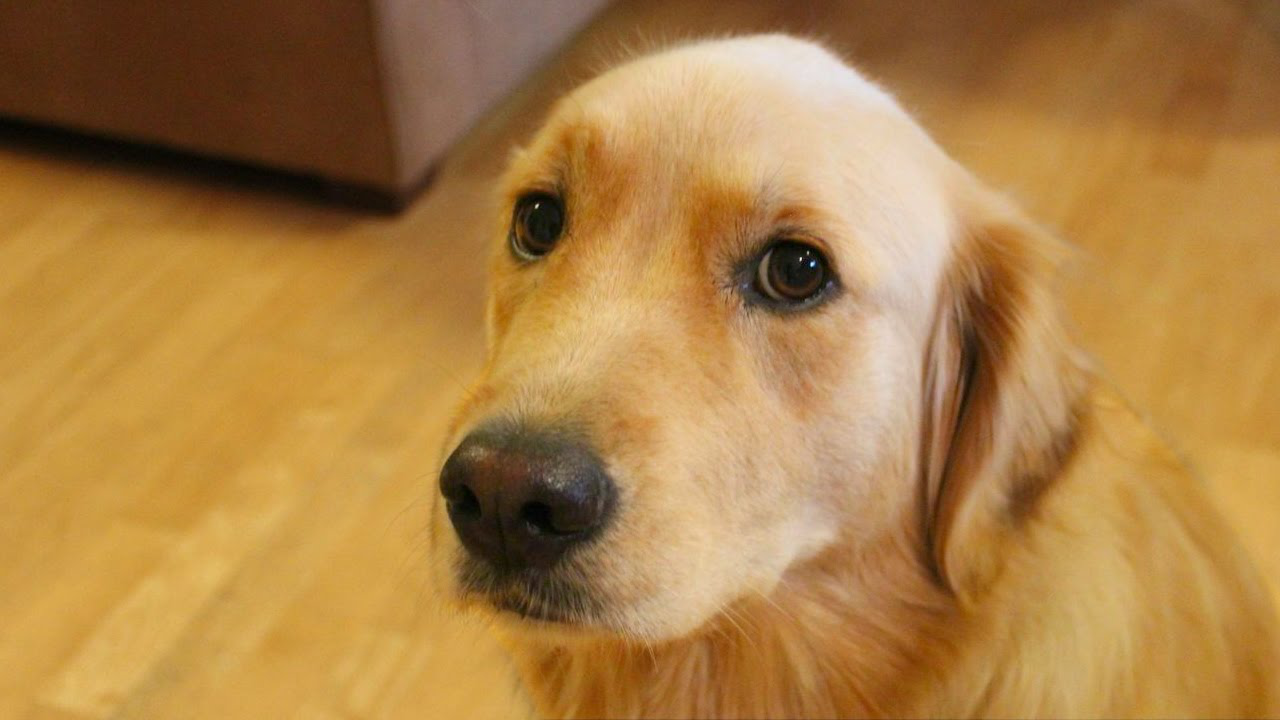

In [26]:
img

Next, we can pass the image through our preprocessing pipeline:

In [27]:
img_t = preprocess(img)

We’re now ready to run our model.

In [12]:
batch_t = torch.unsqueeze(img_t, 0)

Run!
The process of running a trained model on new data is called **inference** in deep learning circles. In order to do inference, we need to put the network in **eval mode**:


 ## Make the predictions

In [13]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
out = resnet(batch_t)
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5182e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

To see the list of predicted labels, we will load a text file listing the labels in the same order they were presented to the network during training, and then we will pick out the label at the index that produced the highest score from the network. Almost all models meant for image recognition have output in a form similar to what we’re about to work with.

Let’s load the file containing the 1,000 labels for the ImageNet dataset classes:

In [15]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

At this point, we need to determine the index corresponding to the maximum score in the out tensor we obtained previously. We can do that using the max function in PyTorch, which outputs the maximum value in a tensor as well as the indices where that maximum value occurred

In [16]:
_, index = torch.max(out, 1)

We can now use the index to access the label. Here, index is not a plain Python number, but a one-element, one-dimensional tensor, so we need to get the actual numerical value to use as an index into our labels list using index[0]. We also use **torch.nn.functional.softmax** (http://mng.bz/BYnq) to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something roughly akin to the confidence that the model has in its prediction. In this case, the model is **96%** certain that it knows what it’s looking at is a golden retriever:

In [17]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.29334259033203)

Since the model produced scores, we can also find out what the second best, third best, and so on were. To do this, we can use the sort function, which sorts the values in ascending or descending order and also provides the indices of the sorted values in the original array:

In [28]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29334259033203),
 ('Labrador retriever', 2.80812668800354),
 ('cocker spaniel, English cocker spaniel, cocker', 0.28267428278923035),
 ('redbone', 0.20863059163093567),
 ('tennis ball', 0.11621591448783875)]

We see that the first four are dogs (redbone is a breed; who knew?), after which things start to get funny. The fifth answer, “tennis ball,” is probably because there are enough pictures of tennis balls with dogs nearby that the model is essentially saying, “There’s a 0.1% chance that I’ve completely misunderstood what a tennis ball is.” This is a great example of the fundamental differences in how humans and neural networks view the world, as well as how easy it is for strange, subtle biases to sneak into our data.

 ## More to read about: 
 
 
  - #### AlexNet: The First CNN to win Image Net?
 https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/#:~:text=AlexNet%20architecture%20consists%20of%205,used%20to%20perform%20max%20pooling.
 
 
  - #### An Overview of ResNet Architecture and Its Variants
 https://builtin.com/artificial-intelligence/resnet-architecture
 
  - #### Pre Trained Models for Image Classification – PyTorch for Beginners
https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
 
